In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.set_index('OSEBuildingID', inplace = True)

In [4]:
data

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12,88434,88434.0,60.0,0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89,0.000000,100.000000,27.730162,54.605993,17.663838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,11,103566,83880.0,61.0,0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20,14.545314,85.454686,0.000000,38.660907,61.339093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,41,956110,756493.0,43.0,0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47,20.574829,79.425171,29.711308,68.230741,2.057944,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,10,61320,61320.0,56.0,0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90,0.000000,100.000000,32.591344,40.751928,26.656717,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,18,175580,123445.0,75.0,0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36,35.311539,64.688461,0.000000,37.880168,62.119825,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1,12294,12294.0,46.0,0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26,0.000000,100.000000,0.000000,61.697384,38.302639,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50223,1.0,1,16000,16000.0,0.0,1,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,32.17,2.01,12,0.000000,100.000000,0.000000,41.729558,58.270426,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50224,1.0,1,13157,7583.0,0.0,1,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42,0.000000,100.000000,0.000000,31.082041,68.917956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
data.loc[data['SourceEUI(kBtu/sf)'].isnull()]

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
773,1.0,4,63150,63150.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,0.0,100.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
26532,1.0,2,20760,20760.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0.0,100.0,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
data.loc[data['TotalGHGEmissions'].isnull(), 'TotalGHGEmissions'] = np.mean(data['TotalGHGEmissions'])

In [7]:
data.loc[data['GHGEmissionsIntensity'].isnull(), 'GHGEmissionsIntensity'] = np.mean(data['GHGEmissionsIntensity'])

In [8]:
data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [9]:
X = data[['Age','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','LargestPropertyUseTypeGFA','ENERGYSTARScore','EnergyStarNaN',
        'PrimaryPropertyType_Distribution Center', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility','CouncilDistrictCode_1',
       'CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_5',
       'CouncilDistrictCode_6', 'CouncilDistrictCode_7']]


y = data['TotalGHGEmissions']

In [10]:
X.head()

,Age,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking(%),PropertyGFABuilding(s)(%),LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,0.000000,100.000000,88434.0,60.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,20,1.0,11,103566,14.545314,85.454686,83880.0,61.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,47,1.0,41,956110,20.574829,79.425171,756493.0,43.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,90,1.0,10,61320,0.000000,100.000000,61320.0,56.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,36,1.0,18,175580,35.311539,64.688461,123445.0,75.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
y.head()

OSEBuildingID
1     249.98
2     295.86
3    2089.28
5     286.43
8     505.01
Name: TotalGHGEmissions, dtype: float64

In [12]:
std_scale = StandardScaler().fit(X)
X_scale = std_scale.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=7)

In [13]:
X_test.shape

(326, 30)

In [14]:
dr = DummyRegressor(strategy="mean")

In [15]:
dr.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [16]:
dr.score(X_test, y_test)

-0.0032552824409906034

In [17]:
baseline_error = mean_squared_error(y_test, dr.predict(y_test), squared=False)

In [18]:
baseline_error

511.7310722960844

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
mean_squared_error(y_test, lr.predict(X_test), squared=False)

431.74379614768736

In [22]:
n_alphas = 100
alphas = np.logspace(-1, 6, n_alphas)

ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, mean_squared_error(y_test, ridge.predict(X_test), squared=False)])

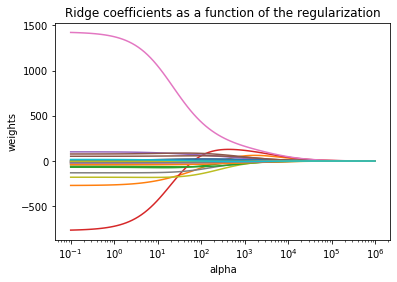

In [23]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

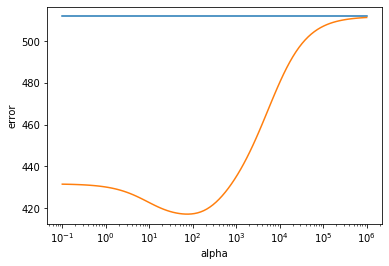

In [24]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [25]:
np.min(errors)

417.21516499020566

In [26]:
errors.index(min(errors))

41

In [27]:
errors[errors.index(min(errors))]

[511.7310722960844, 417.21516499020566]

In [28]:
alphas[errors.index(min(errors))]

79.24828983539169

In [29]:
ridge.set_params(alpha = alphas[errors.index(min(errors))])
ridge.fit(X_train, y_train)

Ridge(alpha=79.24828983539169, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
mean_squared_error(y_test, ridge.predict(X_test), squared=False)

417.21516499020566

In [31]:
n_alphas = 100
alphas = np.logspace(-1, 4, n_alphas)
lasso = Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

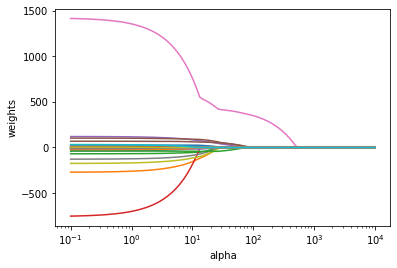

In [32]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

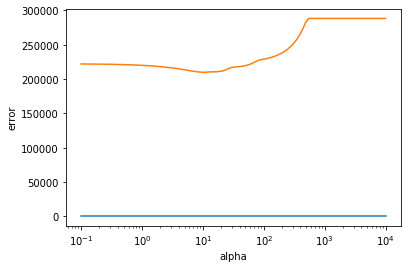

In [33]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [34]:
np.min(errors)

511.7310722960844

In [35]:
errors.index(min(errors))

40

In [36]:
alphas[errors.index(min(errors))]

10.476157527896651

In [37]:
lasso.set_params(alpha = alphas[errors.index(min(errors))])
lasso.fit(X_train, y_train)

Lasso(alpha=10.476157527896651, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
mean_squared_error(y_test, lasso.predict(X_test), squared=False)

458.081436198391

In [39]:
params = {'alpha': np.logspace(0, 7, 150)}

In [40]:
grid = GridSearchCV(Ridge(), params, cv = 10)

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e+00, 1.11424288e+00, 1.24153719e+00, 1.38337396e+00,
       1.54141458e+00, 1.71751022e+00, 1.91372352e+00, 2.13235280e+00,
       2.3759589...
       1.58979923e+06, 1.77142246e+06, 1.97379486e+06, 2.19928686e+06,
       2.45053971e+06, 2.73049642e+06, 3.04243618e+06, 3.39001283e+06,
       3.77729765e+06, 4.20882699e+06, 4.68965549e+06, 5.22541521e+06,
       5.82238167e+06, 6.48754729e+06, 7.22870335e+06, 8.05453121e+06,
       8.97470401e+06, 1.00000000e+07])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
best_params = grid.best_params_
best_params

{'alpha': 911.4472598521194}

In [43]:
res = pd.DataFrame(grid.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000463,0.000095,0.000236,0.000019,1,{'alpha': 1.0},-0.613075,-5.732162,-0.350393,0.364381,0.478081,0.398374,0.242524,-0.052061,0.343105,-0.142171,-0.506340,1.775162,150
1,0.000502,0.000084,0.000280,0.000059,1.11424,{'alpha': 1.1142428752325104},-0.609073,-5.720192,-0.348059,0.365792,0.477900,0.398717,0.241899,-0.049320,0.343208,-0.140947,-0.504007,1.771786,149
2,0.000516,0.000014,0.000318,0.000007,1.24154,{'alpha': 1.2415371850064116},-0.604677,-5.706950,-0.345496,0.367342,0.477693,0.399088,0.241211,-0.046313,0.343317,-0.139610,-0.501439,1.768048,148
3,0.000509,0.000008,0.000318,0.000010,1.38337,{'alpha': 1.3833739627296213},-0.599858,-5.692310,-0.342684,0.369042,0.477456,0.399488,0.240455,-0.043020,0.343430,-0.138152,-0.498615,1.763914,147
4,0.000499,0.000007,0.000311,0.000003,1.54141,{'alpha': 1.5414145817536447},-0.594583,-5.676138,-0.339604,0.370904,0.477185,0.399917,0.239625,-0.039420,0.343546,-0.136567,-0.495514,1.759344,146


In [44]:
cols = [i for i in res.columns if "split" not in i]
res = res[cols].sort_values('rank_test_score')
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score
63,0.000487,0.000004,0.000304,0.000002,911.447,{'alpha': 911.4472598521194},0.337483,0.229469,1
62,0.000487,0.000003,0.000304,0.000002,817.997,{'alpha': 817.9969377519476},0.337094,0.225572,2
64,0.000487,0.000003,0.000305,0.000002,1015.57,{'alpha': 1015.573615440418},0.336449,0.231015,3
61,0.000486,0.000004,0.000303,0.000001,734.128,{'alpha': 734.1280397070122},0.335194,0.219190,4
65,0.000488,0.000005,0.000303,0.000001,1131.6,{'alpha': 1131.5956652786067},0.334087,0.230403,5


In [45]:
def resultize(grid):
    """Faire un dataframe lisible pour grid"""
    
    res = pd.DataFrame(grid.cv_results_)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols].sort_values('rank_test_score')

    return res

In [46]:
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score
63,0.000487,0.000004,0.000304,0.000002,911.447,{'alpha': 911.4472598521194},0.337483,0.229469,1
62,0.000487,0.000003,0.000304,0.000002,817.997,{'alpha': 817.9969377519476},0.337094,0.225572,2
64,0.000487,0.000003,0.000305,0.000002,1015.57,{'alpha': 1015.573615440418},0.336449,0.231015,3
61,0.000486,0.000004,0.000303,0.000001,734.128,{'alpha': 734.1280397070122},0.335194,0.219190,4
65,0.000488,0.000005,0.000303,0.000001,1131.6,{'alpha': 1131.5956652786067},0.334087,0.230403,5


In [47]:
ridge = Ridge(**grid.best_params_)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [48]:
def score(estimator):
    """Calcule et affiche le train et test score"""
    
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)
    
    print(f"score train : {tr_score}, score test {te_score} ")

In [49]:
score(ridge)

score train : 0.3374, score test 0.2791 


In [50]:
mean_squared_error(y_test, ridge.predict(X_test), squared=False)

433.79692984618447

In [51]:
params = {"alpha": np.logspace(-1, 3, 100)}
grid = GridSearchCV(Lasso(), params, cv=10)
grid.fit(X_train, y_train)
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score
76,0.000422,0.000018,0.000202,0.000005,117.681,{'alpha': 117.68119524349991},0.302161,0.241540,1
75,0.000434,0.000026,0.000211,0.000012,107.227,{'alpha': 107.22672220103243},0.301759,0.238017,2
77,0.000419,0.000027,0.000214,0.000021,129.155,{'alpha': 129.1549665014884},0.300899,0.241819,3
74,0.000486,0.000063,0.000222,0.000029,97.701,{'alpha': 97.70099572992257},0.300103,0.232221,4
78,0.000416,0.000010,0.000202,0.000005,141.747,{'alpha': 141.7474162926806},0.297461,0.237681,5


In [52]:
lasso = Lasso(**grid.best_params_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

445.69094577804555

In [53]:
tt = TransformedTargetRegressor(regressor = Ridge(),
                               func = np.log1p,
                               inverse_func = np.expm1)
tt.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=Ridge(alpha=1.0, copy_X=True,
                                           fit_intercept=True, max_iter=None,
                                           normalize=False, random_state=None,
                                           solver='auto', tol=0.001),
                           transformer=None)

In [54]:
y_pred = tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

469.86394249004854

In [55]:
params = {'regressor__alpha': np.logspace(0, 7, 100)}
grid = GridSearchCV(tt, params, cv = 10)

In [56]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'expm1'>,
                                                  regressor=Ridge(alpha=1.0,
                                                                  copy_X=True,
                                                                  fit_intercept=True,
                                                                  max_iter=None,
                                                                  normalize=False,
                                                                  random_state=None,
                                                                  solver='auto',
                                                                  tol=0.001),
                                                  transformer=None),
             iid='depr

In [57]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,params,mean_test_score,std_test_score,rank_test_score
53,0.000923,0.000027,0.000354,0.000003,5590.81,{'regressor__alpha': 5590.810182512223},5.913413e-02,2.766760e-01,1
54,0.000889,0.000005,0.000349,0.000003,6579.33,{'regressor__alpha': 6579.3322465756755},3.709985e-02,2.227728e-01,2
55,0.000888,0.000005,0.000350,0.000003,7742.64,{'regressor__alpha': 7742.63682681127},8.265632e-03,1.476738e-01,3
56,0.000896,0.000013,0.000350,0.000002,9111.63,{'regressor__alpha': 9111.627561154886},-1.211650e-02,9.723825e-02,4
57,0.000907,0.000021,0.000351,0.000004,10722.7,{'regressor__alpha': 10722.672220103232},-2.543519e-02,6.743251e-02,5
...,...,...,...,...,...,...,...,...,...
4,0.000897,0.000003,0.000351,0.000002,1.91791,{'regressor__alpha': 1.9179102616724886},-3.781667e+33,1.134500e+34,96
3,0.000916,0.000034,0.000354,0.000003,1.62975,{'regressor__alpha': 1.6297508346206442},-4.102045e+33,1.230613e+34,97
2,0.000896,0.000003,0.000352,0.000002,1.38489,{'regressor__alpha': 1.384886371393873},-4.397322e+33,1.319197e+34,98
1,0.000899,0.000003,0.000353,0.000001,1.17681,{'regressor__alpha': 1.1768119524349985},-4.666291e+33,1.399887e+34,99


In [58]:
svr = SVR()

In [59]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

518.9267938229668

In [82]:
params = {'kernel': ['sigmoid','rbf','poly','sigmoid'],
         'C': [0.1,1,100,1000],
         'degree': [1,2,3,4,5,6]}
grid = GridSearchCV(SVR(), params, cv=10)
grid.fit(X_train, y_train)
best_params_svr = grid.best_params_
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,mean_test_score,std_test_score,rank_test_score
93,0.053917,0.005869,0.002203,0.000027,1000,6,rbf,"{'C': 1000, 'degree': 6, 'kernel': 'rbf'}",0.310998,0.146318,1
89,0.053945,0.005876,0.002219,0.000035,1000,5,rbf,"{'C': 1000, 'degree': 5, 'kernel': 'rbf'}",0.310998,0.146318,1
85,0.053972,0.005880,0.002233,0.000040,1000,4,rbf,"{'C': 1000, 'degree': 4, 'kernel': 'rbf'}",0.310998,0.146318,1
81,0.054045,0.005858,0.002256,0.000035,1000,3,rbf,"{'C': 1000, 'degree': 3, 'kernel': 'rbf'}",0.310998,0.146318,1
77,0.054120,0.005841,0.002223,0.000036,1000,2,rbf,"{'C': 1000, 'degree': 2, 'kernel': 'rbf'}",0.310998,0.146318,1


In [83]:
best_params_svr = {'C': 1000, 'degree': 6, 'kernel': 'rbf'}

In [84]:
svr = SVR(**best_params_svr)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

398.0529194444658

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

353.19621023188006

In [85]:
"""params = {'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [1,2,3,4,5,6,7,8,9,10],
            'min_samples_split': [2,3,4,5,6,7,8,9,10],
}
grid = GridSearchCV(RandomForestRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_rf = grid.best_params_
resultize(grid).head()"""

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score
406,0.448532,0.001133,0.005155,0.000068,10,200,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.253010,0.579420,1
181,0.273927,0.000810,0.004304,0.000048,5,200,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.251000,0.556903,2
315,0.190678,0.000315,0.002620,0.000033,8,100,"{'max_depth': 8, 'min_samples_split': 2, 'n_es...",0.223299,0.665054,3
408,0.904159,0.005751,0.010119,0.000157,10,400,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.215589,0.692622,4
276,0.345003,0.000851,0.004590,0.000036,7,200,"{'max_depth': 7, 'min_samples_split': 3, 'n_es...",0.214917,0.658383,5


In [81]:
best_params_rf ={'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [65]:
rf = RandomForestRegressor(**best_params_rf)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

328.56730144537846

In [66]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

315.0073903634447

In [86]:
params = {'loss': ['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth': [4, 6],
            'min_samples_leaf': [3, 5, 9, 17],
}
grid = GridSearchCV(GradientBoostingRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_gb = grid.best_params_
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_min_samples_leaf,params,mean_test_score,std_test_score,rank_test_score
22,0.287081,0.002944,0.000544,0.000018,0.1,huber,6,9,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.461074,0.198570,1
18,0.206223,0.002757,0.000505,0.000019,0.1,huber,4,9,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.446559,0.181989,2
54,0.311889,0.003714,0.000624,0.000052,0.05,huber,6,9,"{'learning_rate': 0.05, 'loss': 'huber', 'max_...",0.440150,0.214592,3
2,0.132306,0.002191,0.000465,0.000074,0.1,ls,4,9,"{'learning_rate': 0.1, 'loss': 'ls', 'max_dept...",0.433558,0.329117,4
6,0.189196,0.000899,0.000548,0.000062,0.1,ls,6,9,"{'learning_rate': 0.1, 'loss': 'ls', 'max_dept...",0.430337,0.312378,5


In [79]:
best_params_gb = {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'min_samples_leaf': 9}

In [68]:
gb = GradientBoostingRegressor(**best_params_gb)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

326.8987050219153

In [69]:
ad =  AdaBoostRegressor()
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

548.3273002173772

In [87]:
params = {'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'loss': ['linear', 'square', 'exponential'],
}
grid = GridSearchCV(AdaBoostRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_ad = grid.best_params_
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score
7,0.320769,0.002846,0.007445,0.000107,0.1,square,300,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",0.273143,0.543784,1
3,0.302038,0.132461,0.006955,0.003442,0.1,linear,400,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.258065,0.463266,2
24,0.555483,0.010189,0.012777,0.000527,0.05,square,500,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.189228,0.537085,3
23,0.445025,0.049490,0.009788,0.001270,0.05,square,400,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.176116,0.650377,4
8,0.405191,0.018177,0.009906,0.000471,0.1,square,400,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",0.175702,0.460334,5


In [77]:
best_params_ad = {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 400}

In [71]:
ad = AdaBoostRegressor(**best_params_ad)
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

373.3041926798252

In [72]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

434.81493278918083

In [75]:
params = {'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
}
grid = GridSearchCV(MLPRegressor(), params, cv=10)
grid.fit(X_train_int, y_train_int)
best_params_mlp = grid.best_params_
resultize(grid).head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mlp = MLPRegressor(**best_params_mlp)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)